# Figure 3: STDP

In [2]:
# Imports

## General
import os 
from copy import deepcopy
from itertools import product
from types import SimpleNamespace
import sys
sys.path.append("..")
from RNN_helpers import *
from IPython.display import display, Markdown

## Numerical
import numpy as np
import pandas as pd
import scipy.stats as sps
import math
from scipy.stats import linregress
import statsmodels.formula.api as smf
import statsmodels.api as sm
import  statsmodels.stats.multicomp as smmc
from sklearn.neighbors import KernelDensity

## Plotting
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sb

## Data
import csv
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Plotting defaults and functions

%config InlineBackend.figure_format = 'retina'

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2, 3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'Arial'
plt.rc('font', family='Arial')
plt.rcParams['figure.dpi'] = 150

#Setting Colors
R_COLOR = "#808080"
R_NO_STDP_COLOR = "#B3B3B3"
NNR_COLOR = '#FF767C'
NNR_NO_STDP_COLOR = "#FFBFC1"

PRE_STDP_COLOR = ".6"
STDP_COLOR = "#6214FF"
STDP_SHUFFLE_COLOR = "#BA98FF"
STDP_MEAN_COLOR = "#98DDFF"

## Gross STDP Experiments

In [5]:
EXP_NAME = "gross_STDP"
DIR = "../results_experiments/results_experiment_LIFv2_gross_stdp_halftauIE_x16/"

# Color scheme
COLORS = [mpl.cm.Purples(i/5.) for i in range(2,6)]
#PARAM_NAME = "$N$"

df = pd.read_csv(DIR + "calculate_responsiveness.csv", index_col=0)

s = {}
c = {}
r = {}
d = {}
labels = []
for EE_stdp, IE_stdp in product((False, True), (False, True)):
    if (IE_stdp, EE_stdp) == (False, False):
        label = "Pre-STDP"
    elif (IE_stdp, EE_stdp) == (True, False):
        label = "IE only"
    elif (IE_stdp, EE_stdp) == (False, True):
        label = "EE only"
    elif (IE_stdp, EE_stdp) == (True, True):
        label = "Post-STDP"
    s[label] = []
    c[label] = []
    r[label] = []
    d[label] = 0
    c_df = df[(df["IE_stdp"] == IE_stdp) & (df["EE_stdp"] == EE_stdp)]
    for row in c_df.iterrows():
        for j in range(201, 801):
            try:
                resp = eval(row[1][str(j)])
                if resp['fr_mean'] < 3.3:
                    d[label] += 1
                else:
                    s[label].append(resp["s_mean"])
                    c[label].append(resp["c_mean"])
                    r[label].append(resp["responsiveness"])
            except:
                continue

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

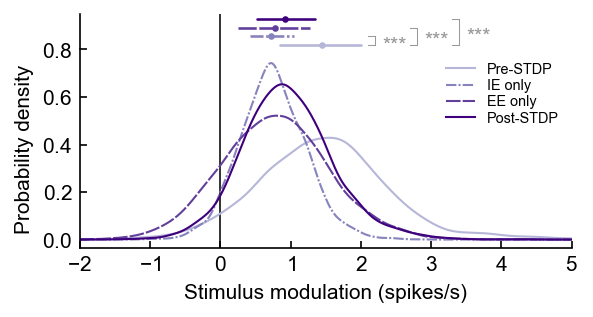

In [8]:
PLOT_NAME = "_stimulus_responsiveness"
XLABEL = "Stimulus modulation (spikes/s)"
LINE_STYLES = ['-', (0, (5,1,1,1)), (0, (7,1)),'-']
COLORS = [mpl.cm.Purples(i/5.) for i in range(2,6)]

fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4,2), show_dead=False)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (p, data) in enumerate(s.items()):
    plot_pdf_and_summary(data, i, ax_d, ax_s, color=COLORS[i], lim=(-2, 5), label=p, n_dead=d[p], ax_dead=None, linestyle=LINE_STYLES[i])
l = ax_d.legend(loc='best', labelspacing=.15, fontsize="x-small")
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)
ax_d.set_yticks([0, .2, .4, .6, .8])

add_summary_sig((0,1), 2.2, "***", ax_s)
add_summary_sig((0,2), 2.8, "***", ax_s)
add_summary_sig((0,3), 3.4, "***", ax_s)


plt.savefig(DIR + EXP_NAME + PLOT_NAME + "_300.png", dpi=300)
plt.savefig(DIR + EXP_NAME + PLOT_NAME + ".pdf", dpi=300)

In [52]:
X1 = s["Pre-STDP"]
for X, name in [(s["IE only"], "IE only"), (s["EE only"], "EE only"), (s["Post-STDP"], "Post-STDP")]:
    median = np.median(X) - np.median(X1)
    #sem = np.sqrt((len(X)*np.var(X) + len(X1)*np.var(X1)) / (len(X) + len(X1)) )
    p = sps.mannwhitneyu(X1, X).pvalue * 3
    print(f"{name}: Delta m = {median:.2f}, p = {p:.2}")

IE only: Delta m = -0.73, p = 0.0
EE only: Delta m = -0.68, p = 1.2e-292
Post-STDP: Delta m = -0.53, p = 3e-198


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

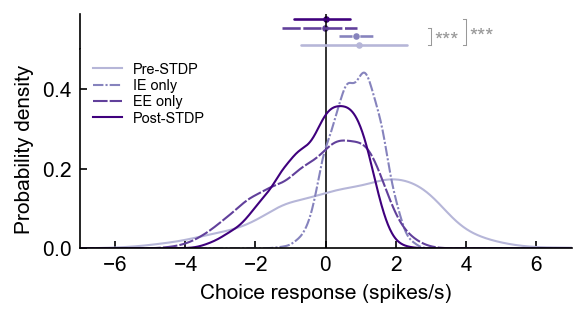

In [12]:
PLOT_NAME = "_choice_responsiveness"
XLABEL = "Choice response (spikes/s)"
LINE_STYLES = ['-', (0, (5,1,1,1)), (0, (7,1)),'-']
COLORS = [mpl.cm.Purples(i/5.) for i in range(2,6)]

fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4,2), show_dead=False)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (p, data) in enumerate(c.items()):
    plot_pdf_and_summary(data, i, ax_d, ax_s, color=COLORS[i], lim=(-7, 7), label=p, n_dead=d[p], ax_dead=None, linestyle=LINE_STYLES[i])
l = ax_d.legend(loc='upper left', labelspacing=.15, fontsize="x-small")
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)
ax_d.set_yticks([0, .2, .4, .6])
ax_d.set_ylim([0, .5])

add_summary_sig((0,3), 4.0, "***", ax_s)
add_summary_sig((0,2), 3.0, "***", ax_s)

plt.savefig(DIR + EXP_NAME + PLOT_NAME + "_300.png", dpi=300)
plt.savefig(DIR + EXP_NAME + PLOT_NAME + ".pdf", dpi=300)

In [61]:
X1 = c["Pre-STDP"]
for X, name in [(c["IE only"], "IE only"), (c["EE only"], "EE only"), (c["Post-STDP"], "Post-STDP")]:
    median = np.median(X) - np.median(X1)
    #sem = np.sqrt((len(X)*np.var(X) + len(X1)*np.var(X1)) / (len(X) + len(X1)) )
    p = sps.mannwhitneyu(X1, X).pvalue * 3
    print(f"{name}: Delta m = {median:.2f}, p = {p:.2}")

IE only: Delta m = -0.07, p = 0.078
EE only: Delta m = -0.97, p = 1.9e-149
Post-STDP: Delta m = -0.95, p = 2.1e-152


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

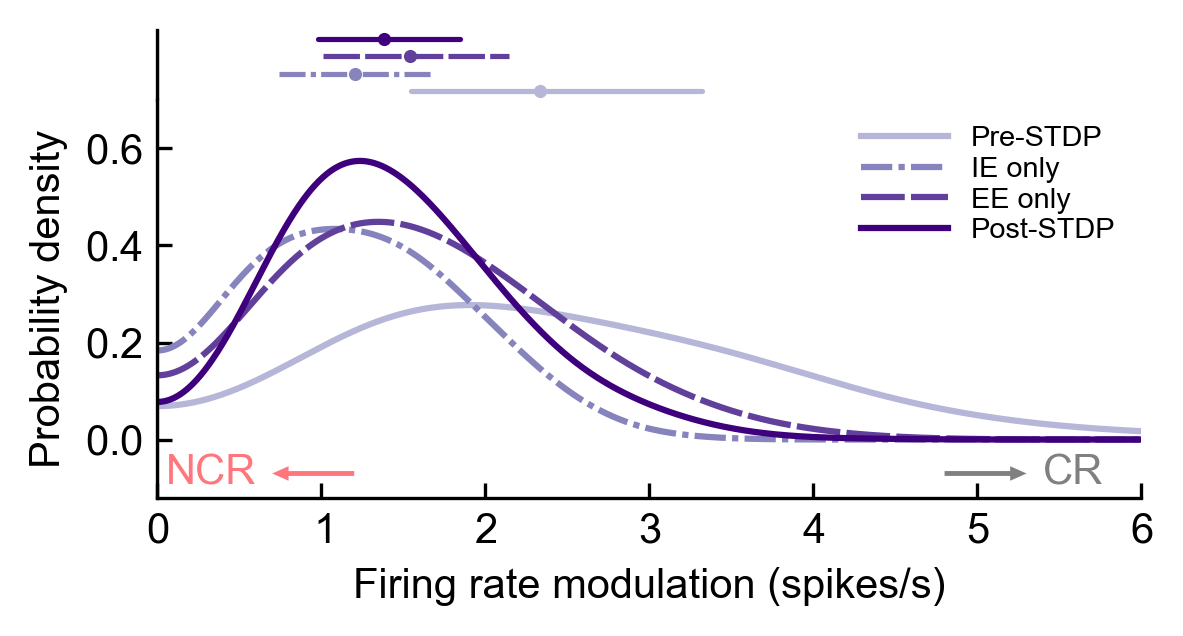

In [22]:
PLOT_NAME = "_responsiveness_4"
XLABEL = "Firing rate modulation (spikes/s)"
LINE_STYLES = ['-', (0, (5,1,1,1)), (0, (7,1)),'-']
COLORS = [mpl.cm.Purples(i/5.) for i in range(2,6)]

fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4, 2), show_dead=False)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (p, data) in enumerate(r.items()):
    plot_pdf_and_summary(data, i, ax_d, ax_s, n_dead=d[p], color=COLORS[i], end_domain=0, lim=(0, 6), label=p, lw=1.5, linestyle=LINE_STYLES[i])
l = ax_d.legend(loc='upper right', labelspacing=.15, fontsize="x-small", handlelength=3)
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)
ax_d.set_ylim([0, .7])
ax_d.set_yticks([0, .2, .4, .6])
add_NCR_CR_scale(ax_d, hoffset=.6, height=0.12)

plt.savefig(DIR + EXP_NAME + PLOT_NAME + "_300.png", dpi=300)
plt.savefig(DIR + EXP_NAME + PLOT_NAME + ".pdf", dpi=300)

In [13]:
print(f"Pre-STDP: {np.median(r['Pre-STDP']):.2f}")
print(f"Post-STDP: {np.median(r['Post-STDP']):.2f}")

Pre-STDP: 2.33
Post-STDP: 1.38


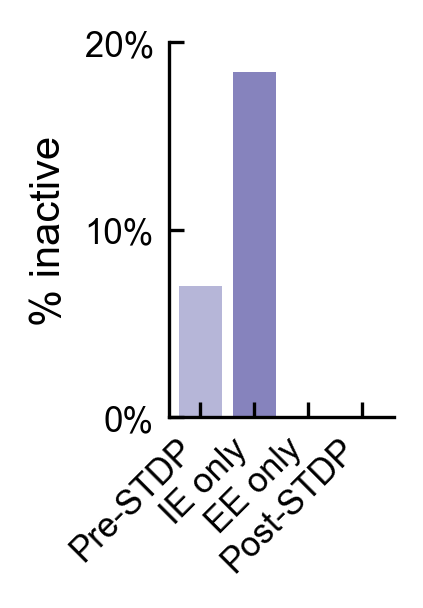

In [23]:
PLOT_NAME = "_responsiveness_inactive"

# fig = plt.figure(figsize=(1.5,2))
# gs = plt.GridSpec(1, 1, bottom=.32, left=.35, right=.95, top=.95)
# ax_dead = fig.add_subplot(gs[0, 0])
fig, ax_dead = make_axis_size(.75, 1.25, bottom=.6, left=.55)

for i, (p, data) in enumerate(r.items()):
    ax_dead.bar(i, d[p] / (d[p] + len(data)), color=COLORS[i], width=.8)
ax_dead.set_yticks([0, .1, .2])
ax_dead.set_yticklabels(["0%", "10%", "20%"], size="small")
ax_dead.set_ylabel("% inactive")
ax_dead.set_xticks(range(4))
ax_dead.set_xticklabels(r.keys(), rotation=45, ha='right', size="small")

plt.savefig(DIR + EXP_NAME + PLOT_NAME + "_300.png", dpi=300)
plt.savefig(DIR + EXP_NAME + PLOT_NAME + ".pdf", dpi=300)

## STDP performance 

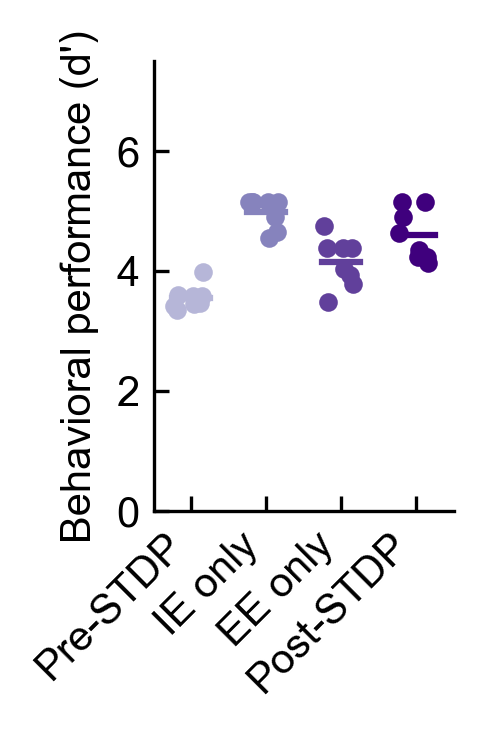

In [25]:
PLOT_NAME = "performance_broken_out"
WIDTH = .5
S = 20

perf_df1 = pd.read_csv(os.path.join(DIR, "calculate_performance.csv"))
n_reps = np.max(perf_df1["n_rep"])
perf_df1 = perf_df1.set_index(["IE_stdp", "EE_stdp", "n_rep"])

#fig, ax = plt.subplots(figsize=(2,2.5))
fig, ax = make_axis_size(1, 1.5, bottom=.6, left=.5)


for i in range(1, n_reps+1):
    x = (np.random.rand() - .5)*WIDTH
    ax.scatter(x, perf_df1.loc[(False, False, i)]["d_prime"], color=COLORS[0], lw=0, zorder=2, s=S) 
    ax.scatter(x+1, perf_df1.loc[(True, False, i)]["d_prime"], color=COLORS[1], lw=0, zorder=2, s=S)
    ax.scatter(x+2, perf_df1.loc[(False, True, i)]["d_prime"], color=COLORS[2], lw=0, zorder=2, s=S)
    ax.scatter(x+3, perf_df1.loc[(True, True, i)]["d_prime"], color=COLORS[3], lw=0, zorder=2, s=S)

X1 = perf_df1.loc[(False, False)]["d_prime"]
X2 = perf_df1.loc[(True, False)]["d_prime"]
X3 = perf_df1.loc[(False, True)]["d_prime"]
X4 = perf_df1.loc[(True, True)]["d_prime"]
ax.plot([-WIDTH/2, WIDTH/2], [X1.mean(), X1.mean()], color=COLORS[0])
ax.plot([-WIDTH/2+1, WIDTH/2+1], [X2.mean(), X2.mean()], color=COLORS[1])
ax.plot([-WIDTH/2+2, WIDTH/2+2], [X3.mean(), X3.mean()], color=COLORS[2])
ax.plot([-WIDTH/2+3, WIDTH/2+3], [X4.mean(), X4.mean()], color=COLORS[3])

ax.set_ylim([0, 7.5])
ax.set_xlim([-.5, 3.5])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Pre-STDP", "IE only", "EE only", "Post-STDP"], rotation=45, ha='right')
ax.set_ylabel("Behavioral performance (d')")

plt.tight_layout()
plt.savefig(os.path.join(DIR, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR, PLOT_NAME+".pdf"))